In [24]:
#%matplotlib inline
#%reload_ext autoreload
#%autoreload 2

In [12]:
import copy
from datetime import datetime
import json
import numpy as np
import os
from pathlib import Path
from typing import Any, Dict, List, Tuple, Union

import matplotlib
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = False
#matplotlib.rc('axes', edgecolor='grey')

import ase
import ase.io as ase_io
from ase import Atoms
from ase.visualize import view

#import warnings
#warnings.filterwarnings("ignore")
#warnings.filterwarnings("ignore", module = "matplotlib\..*" )

In [2]:
os.chdir(os.path.split(os.getcwd())[0]) # set working directory to Molli top level

import ase_utils as au
import constants as C
from dataset import Dataset
import datasets_collections as dc
import features as ft
import features_collections as fc
import utils as ut
import xyz_parser
import molecule_analyzer as A

In [35]:
dset = dc.mol24_crest_conformers
#dset = dc.mol24_xtb_gfn2_opt_steps

dataset_description = dset.description
dataset_sources = dset.names
molecules = au.create_ase_atoms_list_from_dataset(dset)
molecules_names = [x.info["name"] for x in molecules]

features_list = fc.mol24_forbidden_bonds
features_info = [x.get_info(molecules[0]) for x in features_list]

calc_by_features = A.calculate_values_groupby_features(
                                      molecules=molecules,
                                      features_list=features_list
                                      )

calc_by_mols = A.calculate_values_groupby_molecules(
                                      molecules=molecules,
                                      features_list=features_list
                                      )


In [3]:
mol24_ex5_gfnff_crest_conformers = Dataset.create_with_names(
  description="mol24_ex5_gfnff_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex5_gfnff_crest_conformers.xyz"), "mol24_ex5_gfnff_crest_conformers")])

mol24_ex8_gfn2_crest_conformers = Dataset.create_with_names(
  description="mol24_ex8_gfn2_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex8_gfn2_crest_conformers.xyz"), "mol24_ex8_gfn2_crest_conformers")])

mol24_ex10_gfnff_crest_conformers = Dataset.create_with_names(
  description="mol24_ex10_gfnff_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex10_gfnff_crest_conformers.xyz"), "mol24_ex10_gfnff_crest_conformers")])

mol24_ex15_gfnff_crest_conformers = Dataset.create_with_names(
  description="mol24_ex15_gfnff_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex15_gfnff_crest_conformers.xyz"), "mol24_ex15_gfnff_crest_conformers")])

mol24_ex16_gfn2_crest_conformers = Dataset.create_with_names(
  description="mol24_ex16_gfn2_crest_conformers",
  paths_with_names=[(Path("C:/tmp/Molli/data/mol24_ex16_gfn2_crest_conformers.xyz"), "mol24_ex16_gfn2_crest_conformers")])

dataset_list = [mol24_ex5_gfnff_crest_conformers,
                mol24_ex8_gfn2_crest_conformers,
                mol24_ex10_gfnff_crest_conformers,
                mol24_ex15_gfnff_crest_conformers,
                mol24_ex16_gfn2_crest_conformers]

dataset_names = [x.description for x in dataset_list]


In [4]:
def calculate_dataset_list(dataset_list: List[Dataset], features_list: List[ft.Feature]) -> List[Dict]:
    res = []

    for dset in dataset_list:
        dset_dict = {}
        dset_dict["dataset_description"] = dset.description
        dset_dict["dataset_sources"] = dset.names
        molecules = au.create_ase_atoms_list_from_dataset(dset)
        dset_dict["molecules"] = molecules
        dset_dict["molecules_names"] = [x.info["name"] for x in molecules]

        dset_dict["features_list"] = features_list
        dset_dict["features_info"] = [x.get_info(molecules[0]) for x in features_list]

        dset_dict["calc_by_features"] = A.calculate_values_groupby_features(
                                              molecules=molecules,
                                              features_list=features_list
                                              )
        res.append(dset_dict)

    return res

features_list = fc.mol24_forbidden_bonds
dataset_list_results = calculate_dataset_list(dataset_list=dataset_list, features_list=features_list)

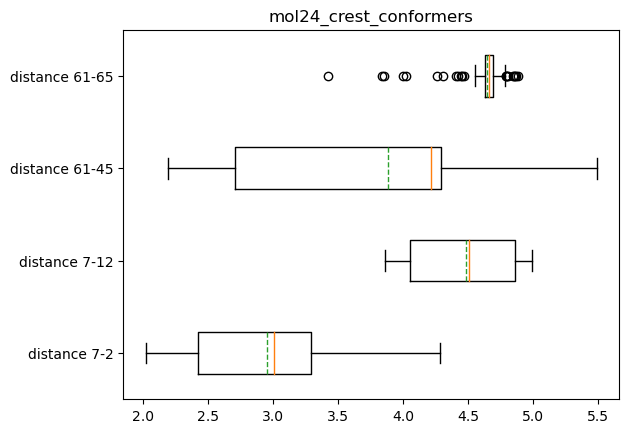

In [24]:
data = [x.values for x in calc_by_features]
labels = [x.name for x in calc_by_features]
user_medians = [np.mean(x) for x in data]

plt.title(dataset_description)
plt.boxplot(
              data,
              labels=labels,
              showmeans=True,
              meanline=True,
              vert=False,
              #usermedians=user_medians,
            );


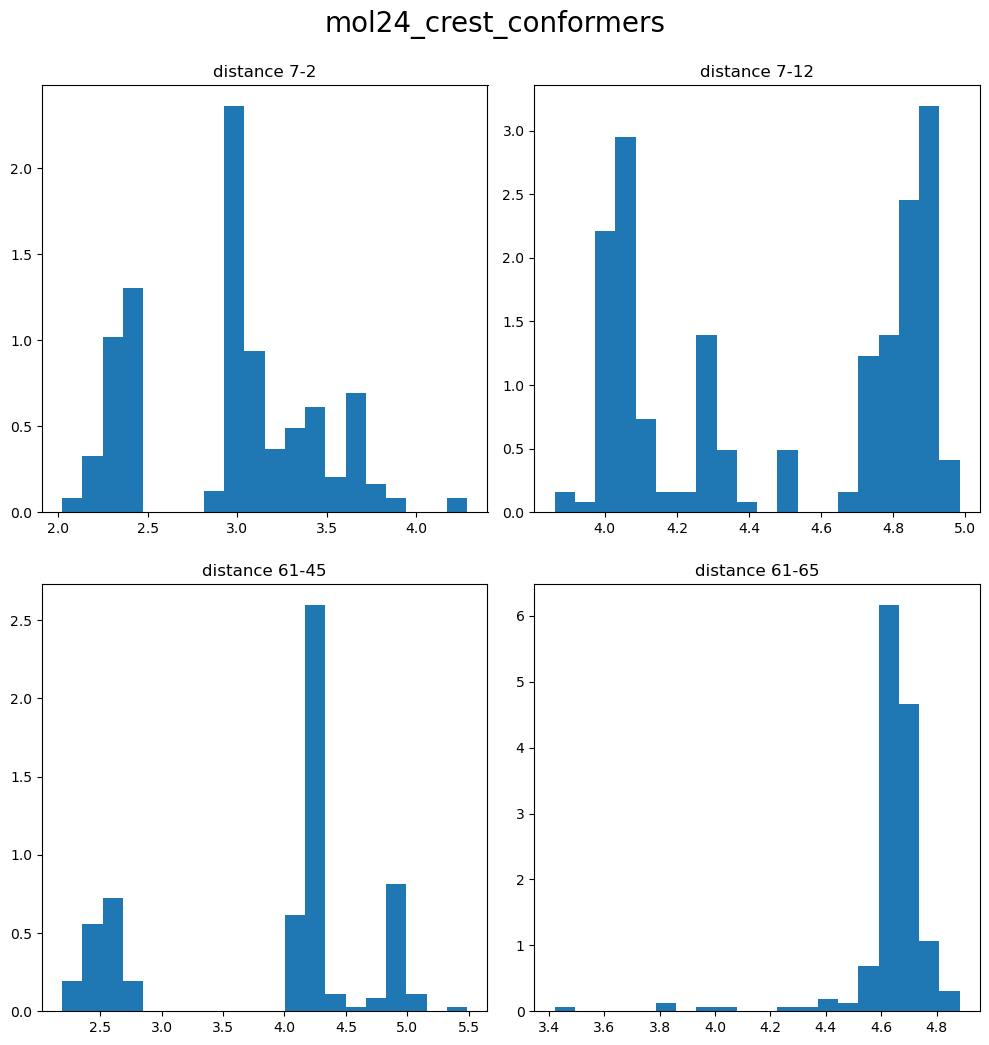

In [25]:
# https://www.kaggle.com/code/ambrosm/msci-eda-which-makes-sense
#_, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))

n = len(calc_by_features)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (10, 10)
num_bins = 20
title = dataset_description

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
for data, ax in zip(calc_by_features, axs.ravel()):
    ax.hist(data.values, bins=num_bins, density=True)
    ax.set_title(data.name)
plt.tight_layout(h_pad=2)
plt.suptitle(title, fontsize=20, y=1.04)
plt.show()


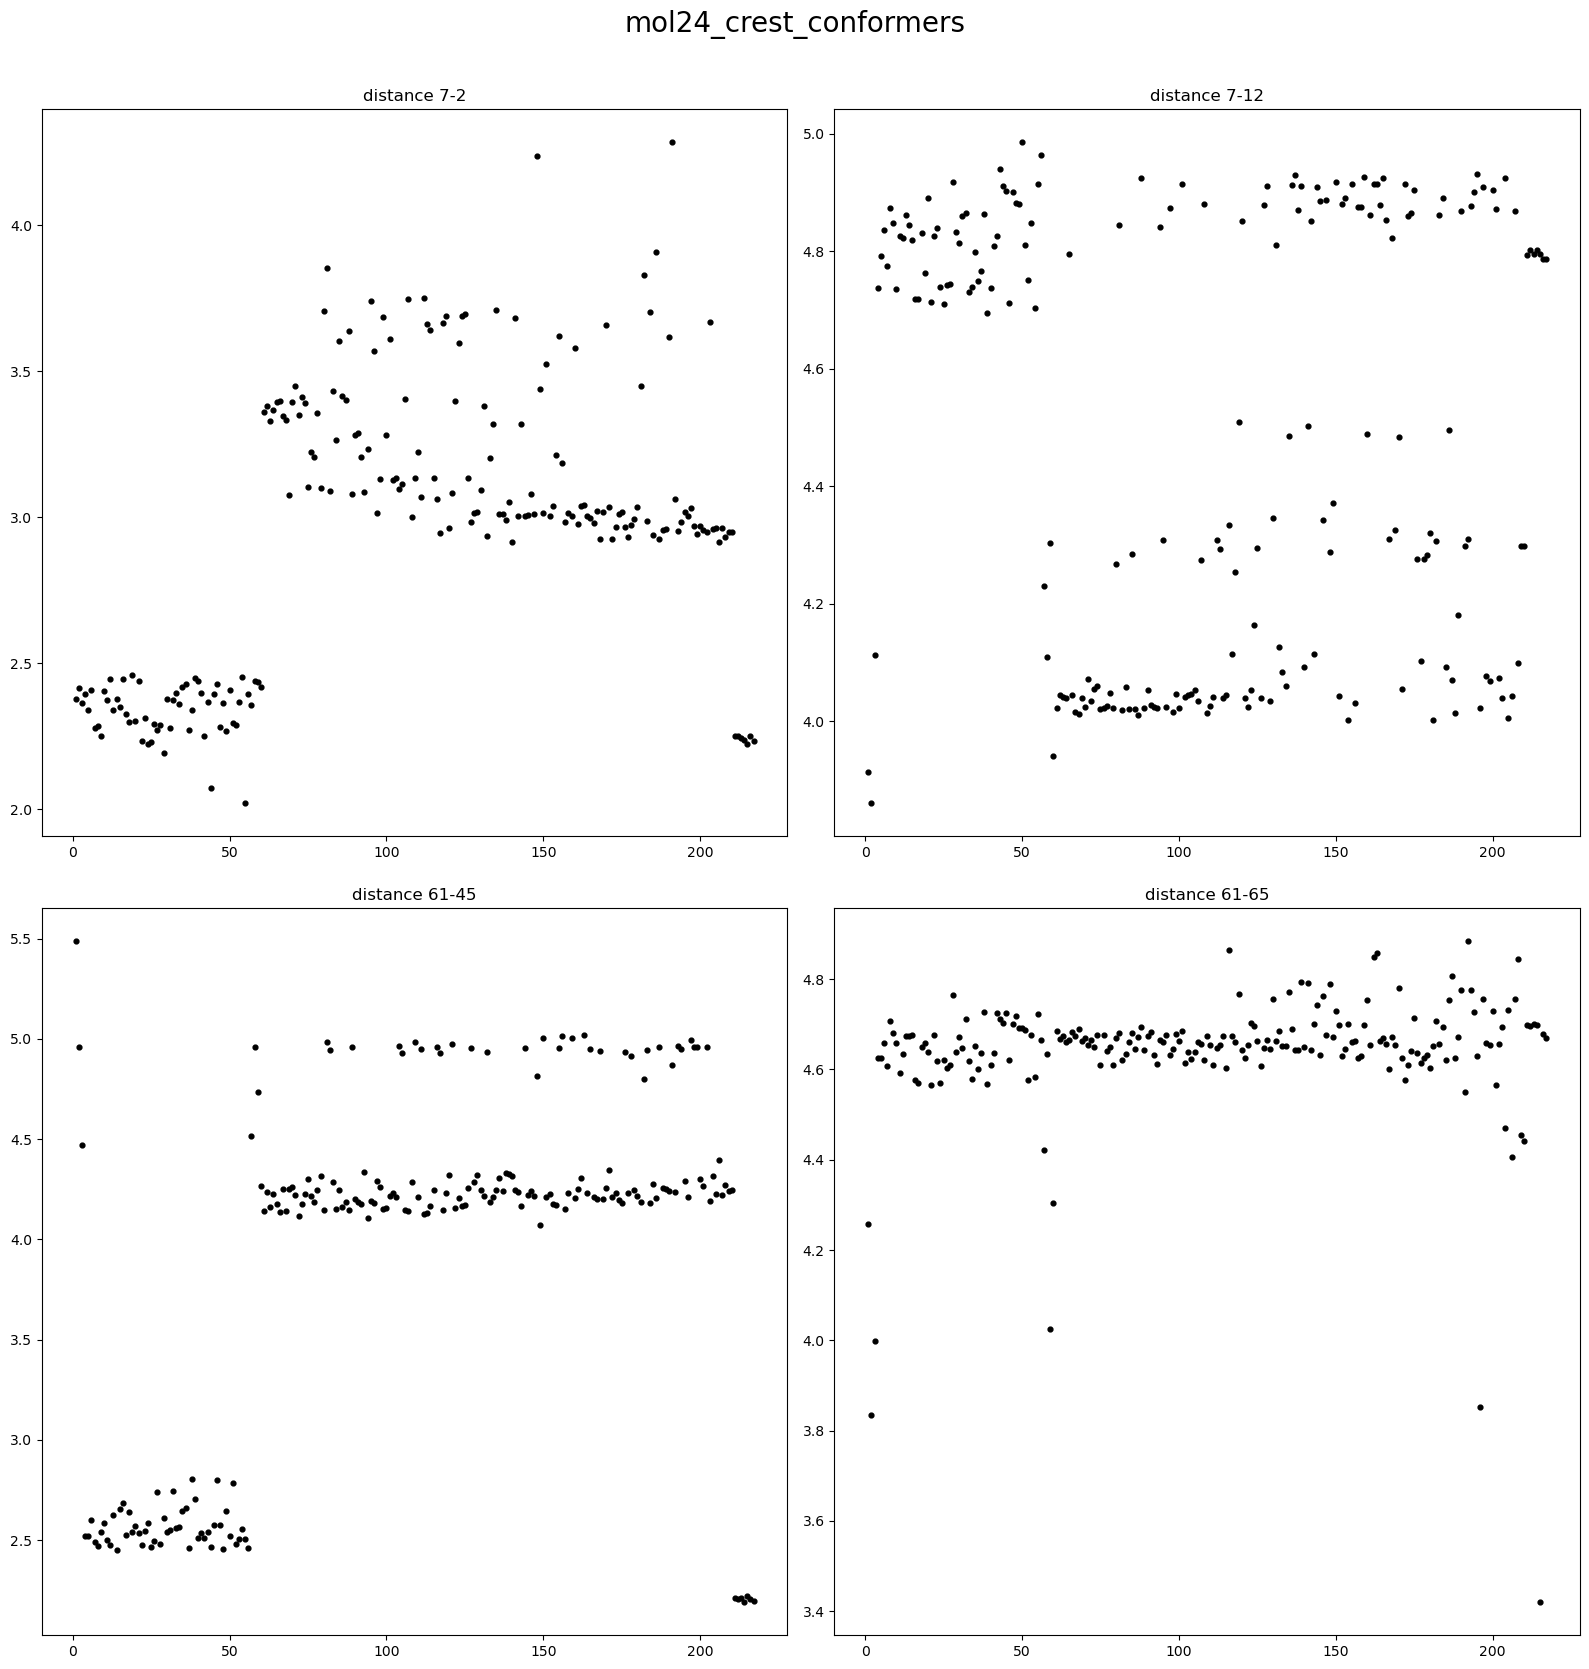

In [27]:
title = dataset_description

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
for data, ax in zip(calc_by_features, axs.ravel()):
    ax.scatter([i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c='black')
    ax.set_title(data.name)
plt.tight_layout(h_pad=2)
plt.suptitle(title, fontsize=20, y=1.04)
plt.show()


In [15]:
colours = list(matplotlib.colors.TABLEAU_COLORS.values())

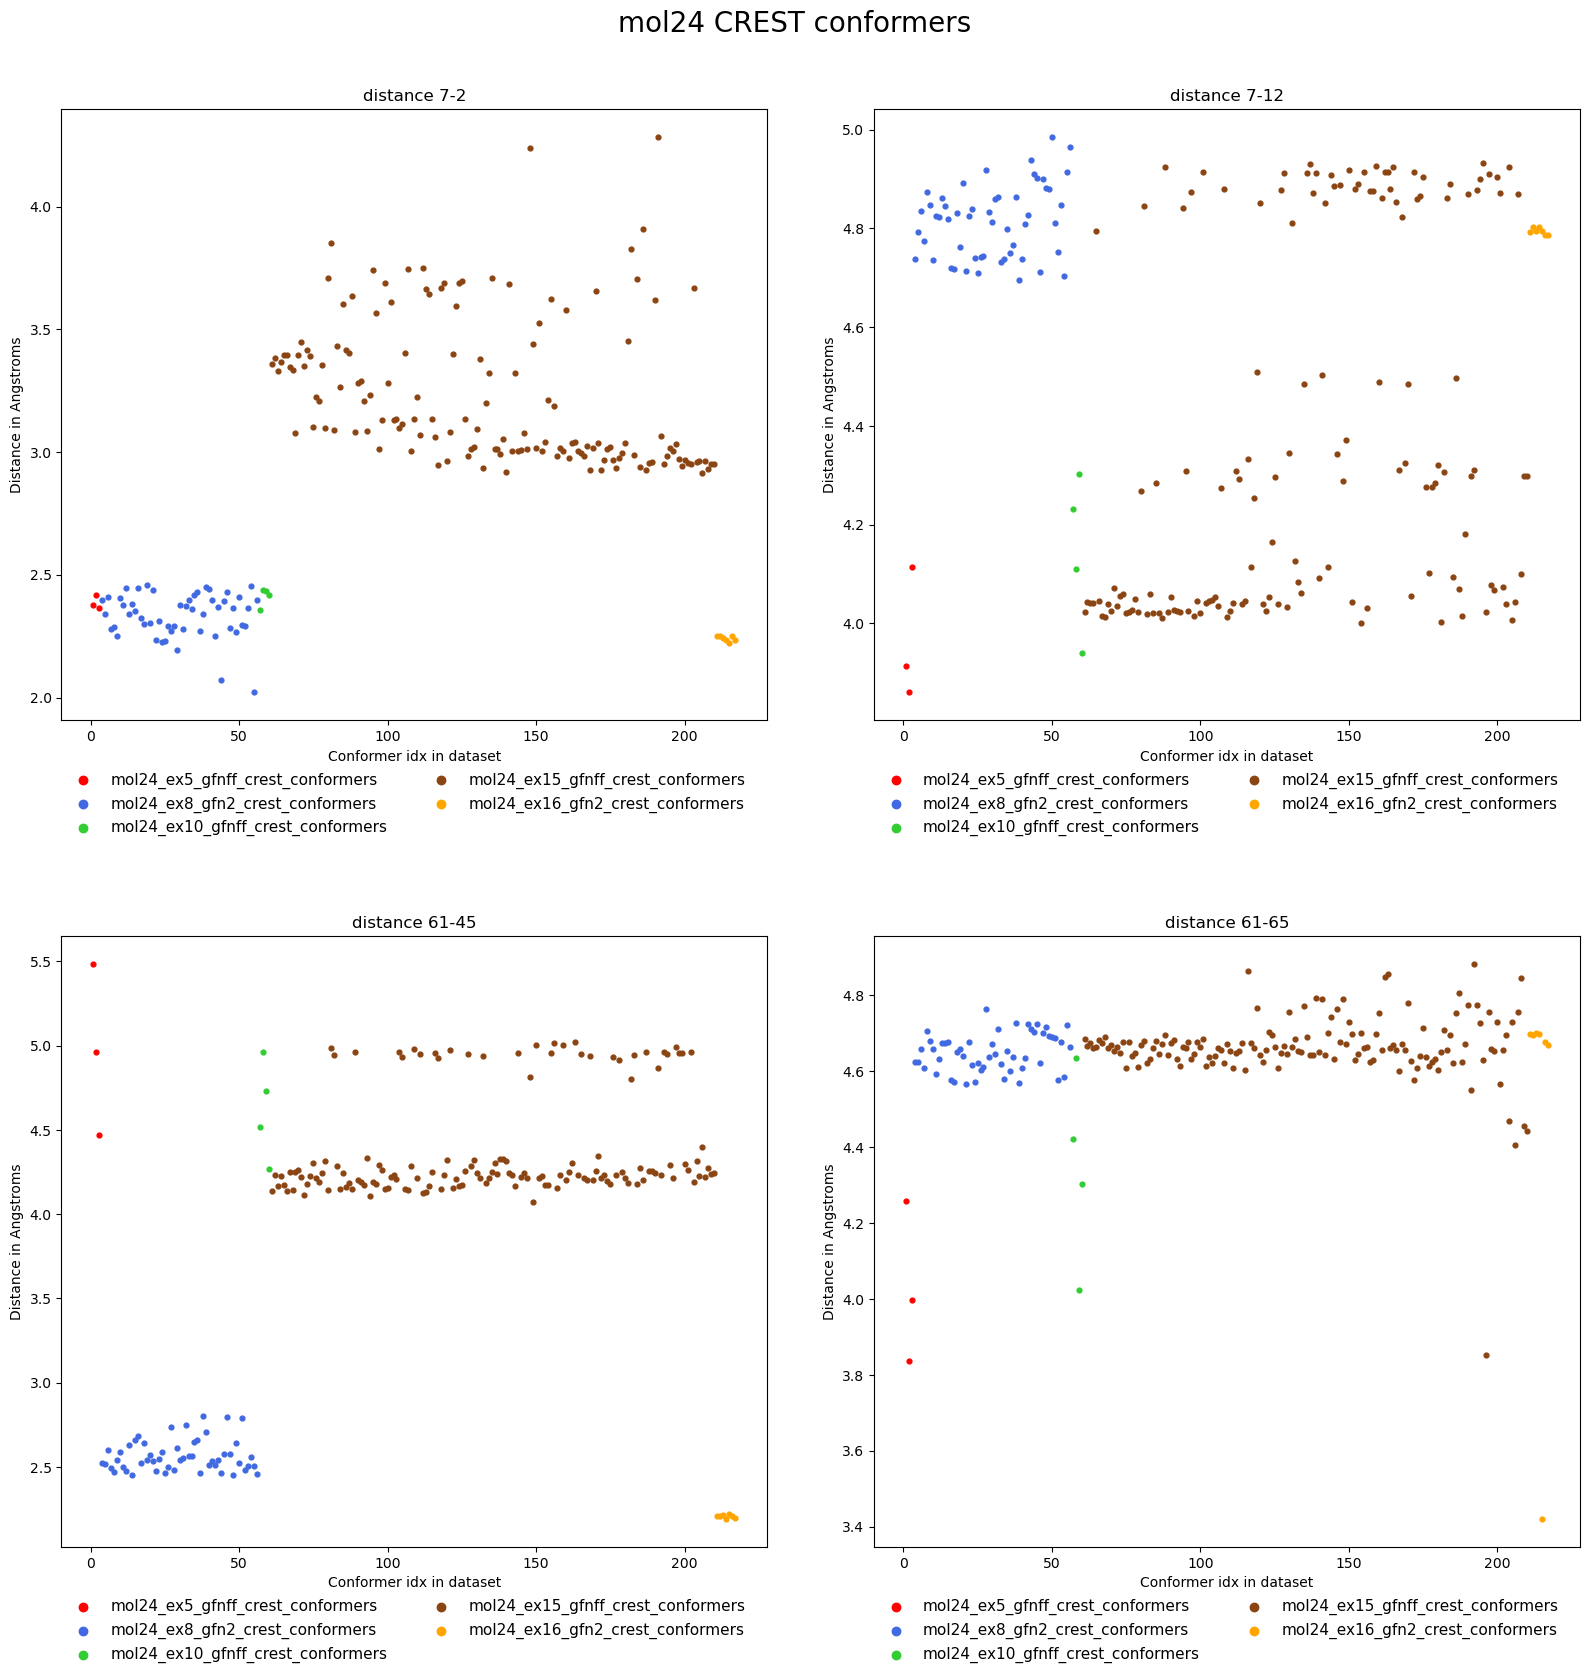

In [29]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
# https://matplotlib.org/stable/gallery/color/named_colors.html

n = len(features_list)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (16, 16)

title = "mol24 CREST conformers"
#colours = list(matplotlib.colors.TABLEAU_COLORS.values())
colours = ["red","royalblue","limegreen","saddlebrown","orange","yellow","black","cyan","grey"]
x_label = "Conformer idx in dataset"
y_label = "Distance in Angstroms"

_, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
start_idx = 0
for dset_idx, calcs in enumerate(dataset_list_results):
    for data, ax in zip(calcs["calc_by_features"], axs.ravel()):
        ax.scatter([start_idx + i + 1 for i, _ in enumerate(data.values)], data.values, s=12, c=colours[dset_idx], label=dataset_names[dset_idx])
        ax.set_title(data.name)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        #ax.legend(loc="upper left")
        ax.legend(loc=(0, -0.2), ncol=2, mode="expand", edgecolor="white", fontsize=11, markerscale=1.75)
    start_idx += len(data.values)
#plt.set_ylabel("Angstrom")
plt.tight_layout(h_pad=6, w_pad=4)
plt.suptitle(title, fontsize=20, y=1.04)
#plt.legend()
plt.show()


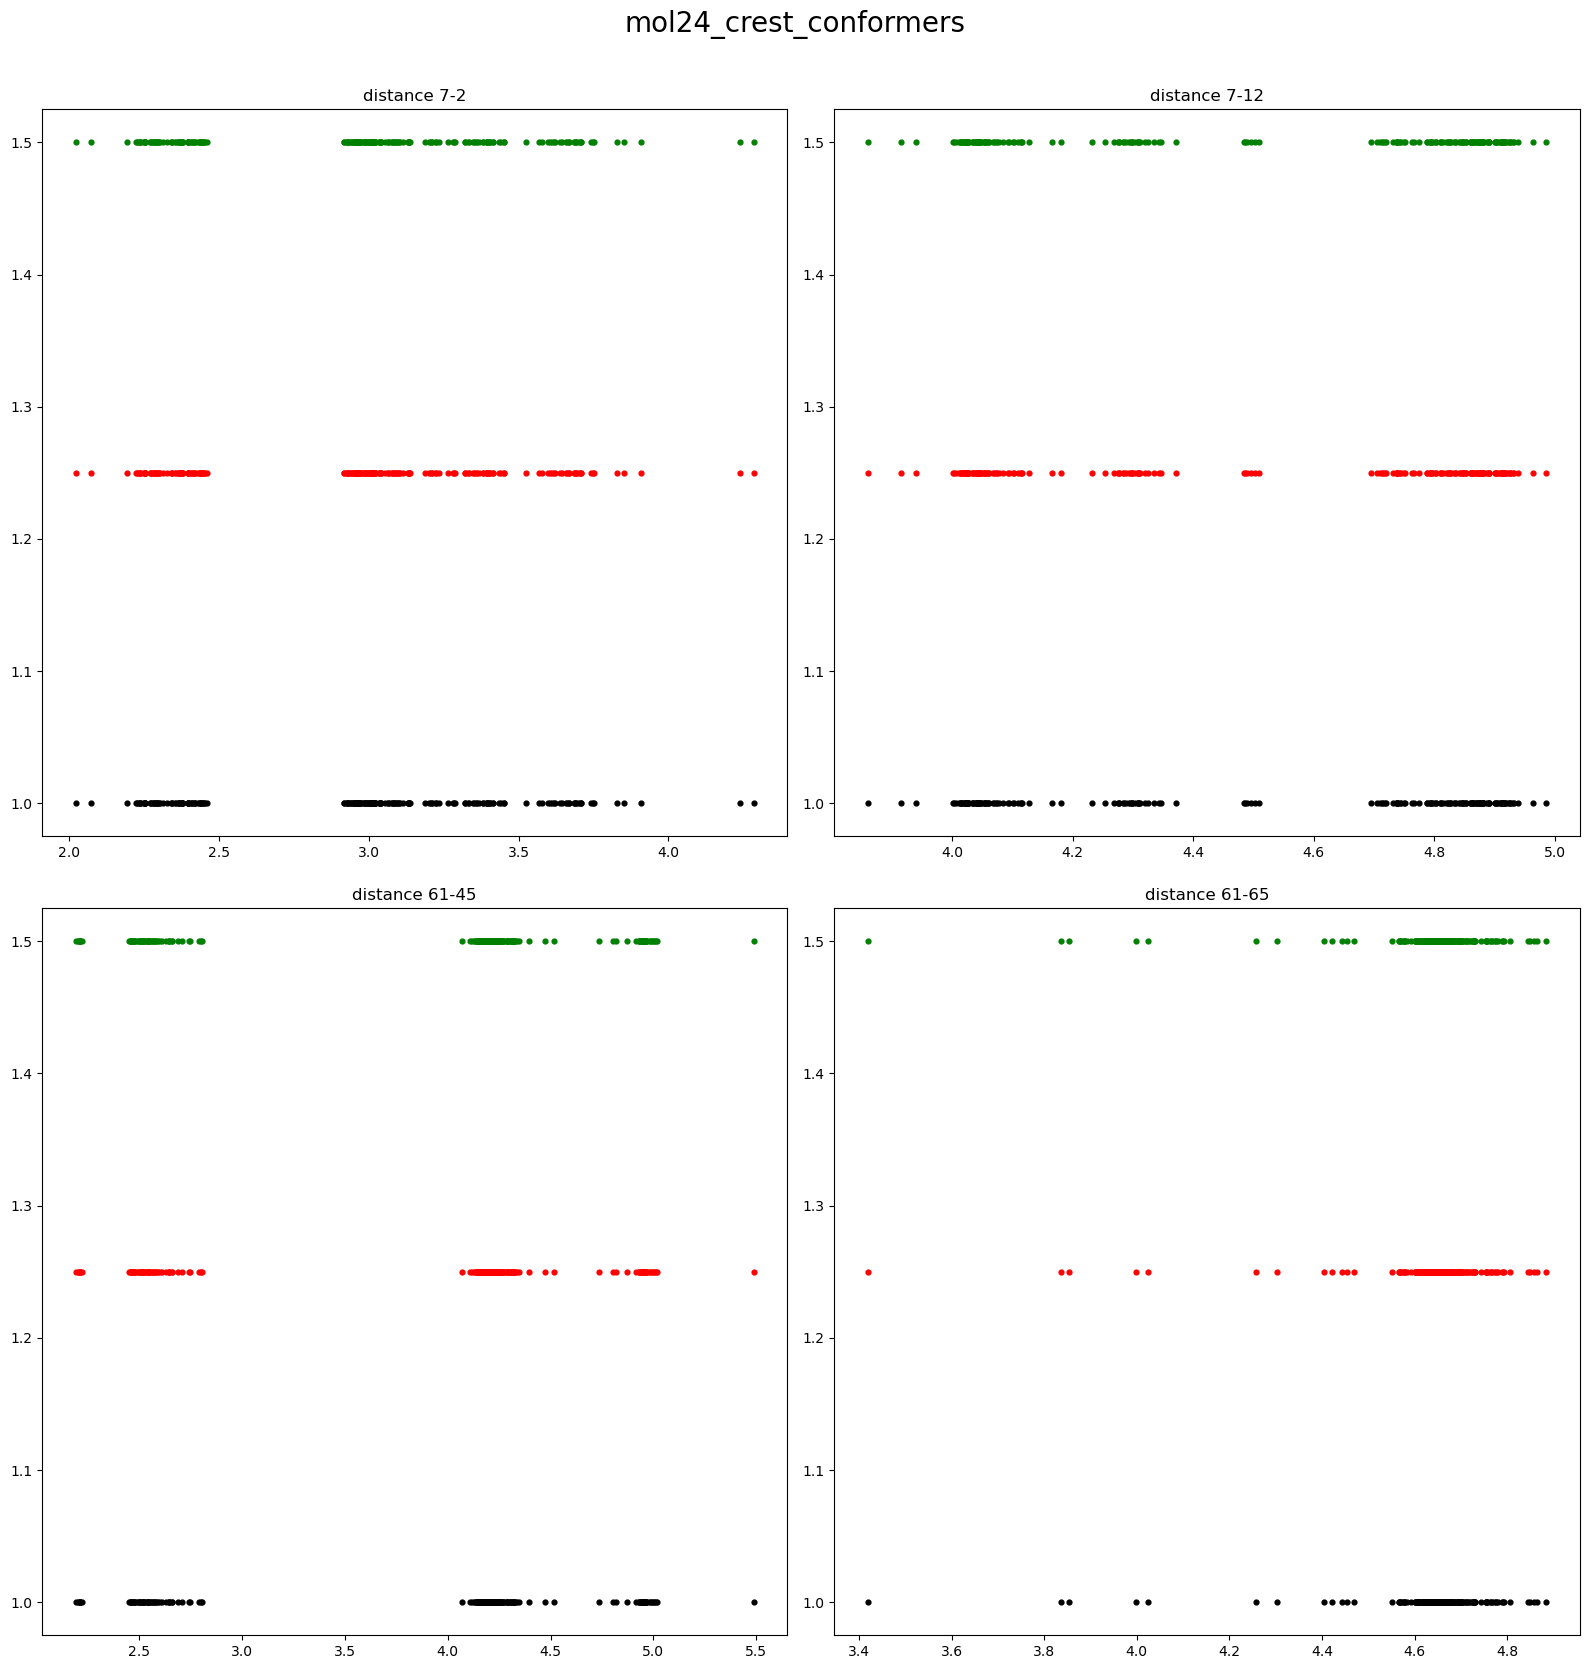

In [29]:
title = dataset_description

_, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
for data, ax in zip(calc_by_features, axs.ravel()):
    ax.scatter(data.values, [1 for _ in data.values], s=12, c='black')
    ax.scatter(data.values, [2 for _ in data.values], s=12, c='red')
    ax.scatter(data.values, [3 for _ in data.values], s=12, c='green')
    ax.set_title(data.name)
plt.tight_layout(h_pad=2)
plt.suptitle(title, fontsize=20, y=1.04)
plt.show()
